In [2]:
import math, keras
from PIL import Image

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Flatten, Dense, Dropout, GlobalAveragePooling2D

# from tensorflow.keras.applications.resnet50 import ResNet50
# from tensorflow.keras.applications.mobilenet import MobileNet
# from tensorflow.keras.applications.resnet_rs import ResNetRS420
# from tensorflow.keras.applications.resnet_v2 import ResNet50V2
# from tensorflow.keras.applications.vgg19 import VGG19
# from tensorflow.keras.applications.nasnet import NASNetLarge
# from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2
# from tensorflow.keras.applications.xception import Xception
# from tensorflow.keras.applications.inception_v3 import InceptionV3
# from tensorflow.keras.applications.densenet import DenseNet169
# from tensorflow.keras.applications.efficientnet_v2 import EfficientNetV2S
from tensorflow.keras.applications.convnext import ConvNeXtXLarge

import matplotlib.pyplot as plt
%matplotlib inline 

In [3]:
# Каталог с данными для обучения
train_dir = 'DATASET/train'
# Каталог с данными для проверки
val_dir = 'DATASET/validation'
# Каталог с данными для тестирования
test_dir = 'DATASET/test'
# Размеры изображения
img_width, img_height = 224, 224
# Размер мини-выборки
batch_size = 64
# число классов
num_classes = 2

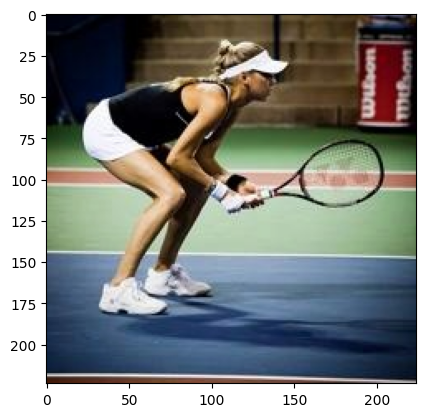

In [4]:
image_file_name = train_dir + '/1/343.jpeg' # with watermark
img = Image.open(image_file_name)
plt.imshow(img)

In [5]:
train_datagen = ImageDataGenerator(rescale=1. / 255)#, featurewise_center=True, featurewise_std_normalization=True)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

Found 74040 images belonging to 2 classes.


In [6]:
test_datagen = ImageDataGenerator(rescale=1. / 255)#, featurewise_center=True, featurewise_std_normalization=True)

val_generator = test_datagen.flow_from_directory(
    val_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

Found 24680 images belonging to 2 classes.


In [7]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

Found 24680 images belonging to 2 classes.


In [8]:
def model_maker(activation):
    # base_model = ResNet50(include_top=False, input_shape = (img_width, img_height, 3))
    # base_model = MobileNet(include_top=False, input_shape = (img_width, img_height, 3))
    # base_model = ResNetRS420(include_top=False, input_shape = (img_width, img_height, 3))
    # base_model = ResNet50V2(include_top=False, input_shape = (img_width, img_height, 3))
    # base_model = VGG19(include_top=False, input_shape = (img_width, img_height, 3))
    # base_model = NASNetLarge(include_top=False, input_shape = (img_width, img_height, 3))
    # base_model = InceptionResNetV2(include_top=False, input_shape = (img_width, img_height, 3))
    # base_model = Xception(include_top=False, input_shape = (img_width, img_height, 3))
    # base_model = InceptionV3(include_top=False, input_shape = (img_width, img_height, 3))
    # base_model = DenseNet169(include_top=False, input_shape = (img_width, img_height, 3))
    # base_model = EfficientNetV2S(include_top=False, input_shape = (img_width, img_height, 3))
    base_model = ConvNeXtXLarge(include_top=False, input_shape = (img_width, img_height, 3))
    
    for layer in base_model.layers[:]:
        layer.trainable = False # Freeze the layers
        
    input = Input(shape=(img_width, img_height, 3))
    custom_model = base_model(input)
    custom_model = GlobalAveragePooling2D()(custom_model)
    custom_model = Dense(64, activation='relu')(custom_model)
    custom_model = Dropout(0.5)(custom_model)
    predictions = Dense(num_classes, activation=activation)(custom_model) # activation = 'sigmoid', activation = 'softmax'
    return Model(inputs=input, outputs=predictions)

In [9]:
model = model_maker('softmax') #sigmoid

model.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 convnext_xlarge (Functiona  (None, 7, 7, 2048)        348147968 
 l)                                                              
                                                                 
 global_average_pooling2d (  (None, 2048)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 64)                131136    
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 2)                 130  

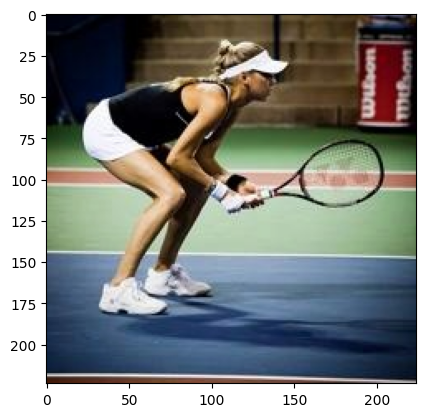

In [17]:
from keras.preprocessing.image import load_img, img_to_array
_img = load_img(train_dir + '/1/343.jpeg', target_size=(224,224))
plt.imshow(_img)

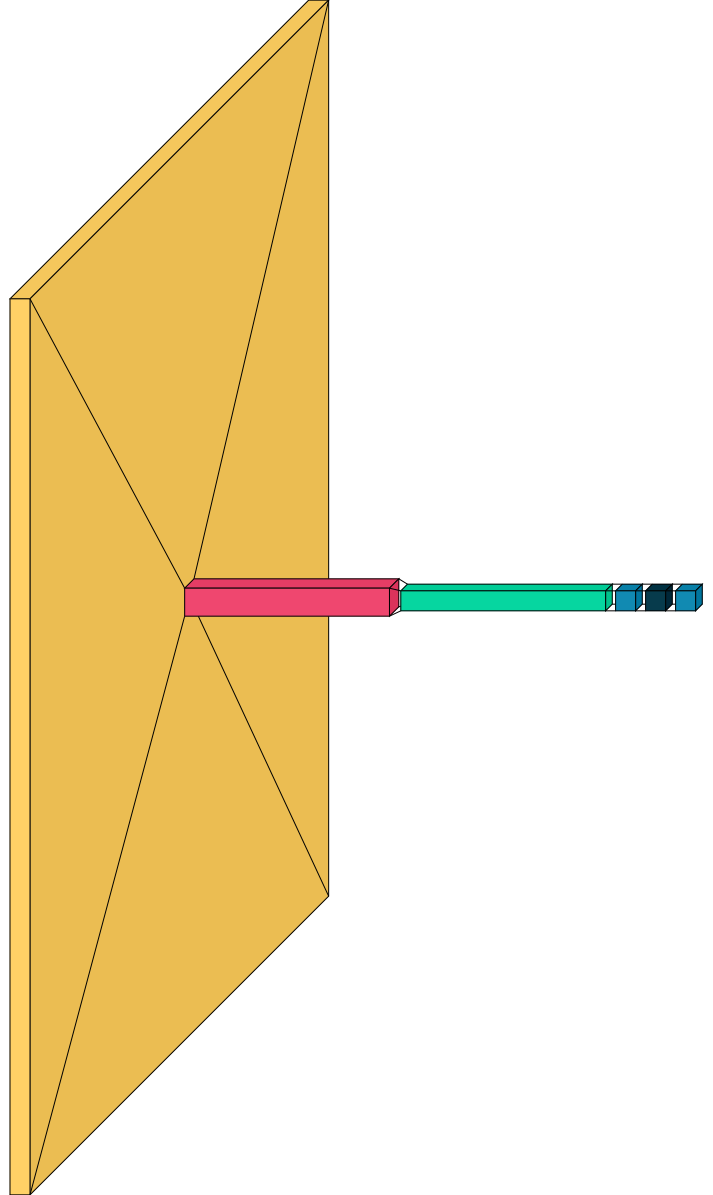

In [32]:
!pip install visualkeras
import visualkeras
visualkeras.layered_view(model)

In [56]:
image = img_to_array(_img)
# expand dimensions so that it represents a single 'sample'
image = np.expand_dims(image, axis=0)

from tensorflow.keras.applications.convnext import preprocess_input
# from tensorflow.keras.applications.vgg16 import preprocess_input
# prepare the image for vgg model ie scale pixel values
image = preprocess_input(image)

In [57]:
features = model.predict(image)
print(features)

# fig = plt.figure(figsize=(20,15))
# for i in range(1,features.shape[3]+1): 
#     plt.subplot(8,8,i)
#     plt.xticks([])
#     plt.yticks([])
#     plt.imshow(features[0,:,:,i-1] , cmap='gray')
# plt.show()

1/1 [==============================] - 5s 5s/step
[[0.59817636 0.40182367]]


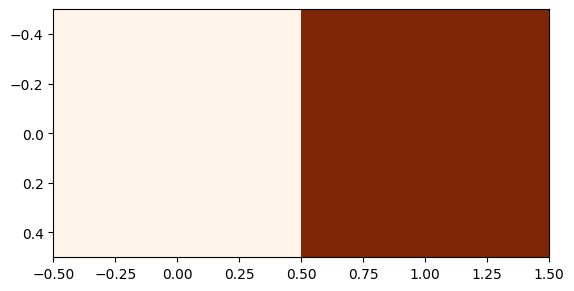

In [63]:
plt.imshow(features[:] , cmap='Oranges_r')

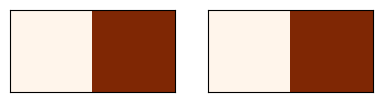

In [64]:
fig = plt.figure(figsize=(20,15))
for i in range(1,features.shape[1]+1): 
    plt.subplot(8,8,i)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(features[:,:] , cmap='Oranges_r')

In [24]:
from keras import metrics

#Binary cross entropy of each label. So no really a binary classification problem but
#Calculating binary cross entropy for each label. 
# model.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-3), loss='categorical_crossentropy', metrics=['accuracy'])

# model.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-3), loss='categorical_crossentropy', metrics=[metrics.mae, metrics.categorical_accuracy])
# model.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-3), loss='categorical_crossentropy', metrics=[metrics.categorical_accuracy])
model.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-3), loss='categorical_crossentropy', metrics=['accuracy',
                                                                                                             metrics.TruePositives(),
                                                                                                             metrics.TrueNegatives(),
                                                                                                            metrics.FalsePositives(),
                                                                                                            metrics.FalseNegatives()])

In [25]:
# Обучаем модель с использованием генераторов
# train_generator - генератор данных для обучения
# validation_data - генератор данных для проверки

# Need to run with real data to infer shape of different layers
history = model.fit(train_generator,
    steps_per_epoch=6,
    epochs=11,
    validation_data=val_generator,
    validation_steps=1)

Epoch 1/11
6/6 [==============================] - 813s 138s/step - loss: 0.7662 - accuracy: 0.5052 - true_positives_2: 194.0000 - true_negatives_2: 194.0000 - false_positives_2: 190.0000 - false_negatives_2: 190.0000 - val_loss: 0.7078 - val_accuracy: 0.4531 - val_true_positives_2: 29.0000 - val_true_negatives_2: 29.0000 - val_false_positives_2: 35.0000 - val_false_negatives_2: 35.0000
Epoch 2/11
6/6 [==============================] - 812s 139s/step - loss: 0.7057 - accuracy: 0.5078 - true_positives_2: 195.0000 - true_negatives_2: 195.0000 - false_positives_2: 189.0000 - false_negatives_2: 189.0000 - val_loss: 0.6975 - val_accuracy: 0.4531 - val_true_positives_2: 29.0000 - val_true_negatives_2: 29.0000 - val_false_positives_2: 35.0000 - val_false_negatives_2: 35.0000
Epoch 3/11
6/6 [==============================] - 821s 141s/step - loss: 0.7026 - accuracy: 0.4557 - true_positives_2: 175.0000 - true_negatives_2: 175.0000 - false_positives_2: 209.0000 - false_negatives_2: 209.0000 - val

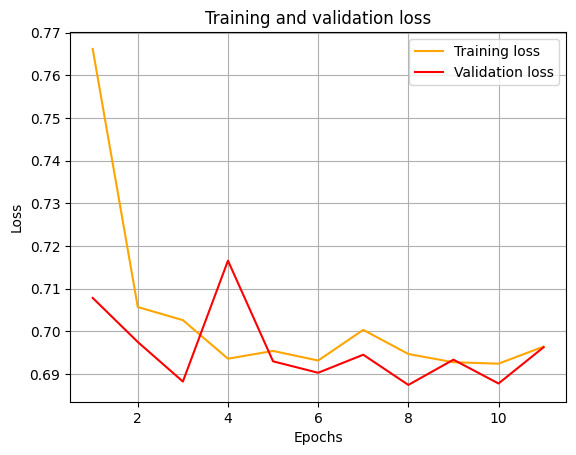

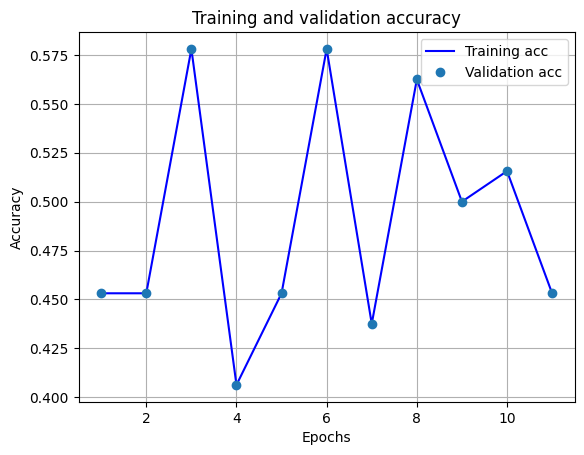

In [27]:
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'orange', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.savefig('loss-norm-cocowm-11epochs.png')
plt.show()


acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'blue', label='Training acc')
plt.plot(epochs, val_acc, 'o', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.savefig('acc-norm-cocowm-11epochs.png')
plt.show()

In [28]:
scores = model.evaluate(test_generator)
# print(f"\nТочность на тестовых данных: {(scores[1]*100):.2f}%")

386/386 [==============================] - 42908s 111s/step - loss: 0.6936 - accuracy: 0.4998 - true_positives_2: 12335.0000 - true_negatives_2: 12335.0000 - false_positives_2: 12345.0000 - false_negatives_2: 12345.0000


In [29]:
print(model.metrics_names)
print(scores)

['loss', 'accuracy', 'true_positives_2', 'true_negatives_2', 'false_positives_2', 'false_negatives_2']
[0.6936306357383728, 0.49979740381240845, 12335.0, 12335.0, 12345.0, 12345.0]


In [30]:
from math import sqrt
mcc = (scores[-4]*scores[-3] - scores[-2]*scores[-1])/sqrt((scores[-4]+scores[-2])*(scores[-4]+scores[-1])*(scores[-3]+scores[-2])*(scores[-3]+scores[-1]))
print(f'Коэффициент корреляции Мэтьюса = {mcc}')

Коэффициент корреляции Мэтьюса = -0.0004051863857374392
